In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM
# import fastai
# import fastai.tabular
#from fastai.tabular import add_datepart
#from pandas_datareader import data as pdr

import datetime as dt
from datetime import timedelta
#import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style

import pypfopt

from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import DiscreteAllocation
from pypfopt import risk_models, expected_returns, plotting
from pypfopt import objective_functions
from pypfopt import CLA, plotting

import csv


In [2]:
#8% risk, 27% returns, 45% ARK, 30% Healthcare

In [3]:
o_ticker = yf.Ticker('O')

In [4]:
dividends = pd.DataFrame(o_ticker.dividends)

In [1]:
# past_year = dividends.loc[dividends.index > '2020-01-01']

# for date in past_year.index:
#     print('testing something {0:%B}'.format(date, 'month'))

# past_year

In [89]:
ticker_names = ['O', 'NKE', 'AAPL', 'ARKK']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tickers = yf.Tickers(' '.join(ticker_names))

In [90]:
len(tickers.tickers)

4

In [91]:
new_df = {}
for item in tickers.tickers:
    ticker = item.ticker
    new_df[ticker] = [i for i in range(13)]
    if item.info['dividendYield'] is not None:
        new_df[ticker][0] = item.info['dividendYield'] * 100

for item in tickers.tickers:
    dividends = pd.DataFrame(item.dividends)
    past_year = dividends.loc[dividends.index > '2020-01-01']

    for date in past_year.index:
        new_df[item.ticker][date.month] = True

cols = months.copy()
cols.insert(0, 'APY')
new_df = pd.DataFrame.from_dict(new_df, orient='index', columns=cols)
    

In [88]:
# o_ticker.info
# ark_ticker = yf.Ticker('arkk')

for month in months:
    new_df[month] = new_df[month].apply(lambda x: type(x) is not int)

new_df


O        True
NKE     False
AAPL    False
ARKK    False
Name: January, dtype: bool

In [57]:
# ark_ticker.dividends
new_df

,APY,January,February,March,April,May,June,July,August,September,October,November,December
O,4.69,True,True,True,True,True,True,True,True,True,True,True,True
NKE,0.82,1,True,3,4,True,6,7,True,9,10,11,True
AAPL,0.68,1,True,3,4,True,6,7,True,9,10,True,12
ARKK,0.00,1,2,3,4,5,6,7,8,9,10,11,True


In [20]:
o_ticker.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-06,72.485638,73.334371,70.759558,73.095963,2857300,0.0,0
2020-03-09,68.003553,71.474776,67.707929,69.920357,3874300,0.0,0
2020-03-10,71.322207,73.124573,69.329111,73.038742,3725100,0.0,0
2020-03-11,71.617858,71.827658,68.909543,70.149261,3661500,0.0,0
2020-03-12,65.352454,70.206448,62.996980,64.599083,4919500,0.0,0
...,...,...,...,...,...,...,...
2021-03-01,61.169998,61.750000,60.450001,60.509998,2930500,0.0,0
2021-03-02,60.500000,60.720001,59.709999,60.369999,3408800,0.0,0
2021-03-03,60.369999,61.500000,60.299999,60.779999,3118600,0.0,0


In [21]:
o_ticker.info['dividendYield']


0.0469

In [24]:
o_ticker.dividends

Date
1994-10-26    0.075
1994-11-25    0.075
1994-12-27    0.075
1995-01-26    0.075
1995-02-23    0.075
              ...  
2020-10-30    0.234
2020-11-30    0.234
2020-12-31    0.235
2021-01-29    0.235
2021-02-26    0.235
Name: Dividends, Length: 316, dtype: float64

In [4]:
tickers30 = "GBTC CIBR ROBO SKYY AIEQ ICLN GAMR CRSP XBI MILN ESGV GXC SUSA VFTAX CRBN" 
tickers150 = "VGT VITAX SPY ARKW ARKK TXG FDN MGC SCHD VWO AMZN AAPL GOOG MSFT GE V NVDA PYPL ADBE CSCO QCOM INTU SQ TSLA ROKU TDOC Z SPOT PRLB FB PACB" 
tickers210 = "BND VGIT GLTR AGG GOVT" 

In [2]:
#Start Dates
date = dt.datetime.today().strftime("%Y-%m-%d")
#date = date -1


#date = dt.date.today() + dt.timedelta(-1)
#date = date.strftime("%Y-%m-%d")
st210 = dt.date.today() + dt.timedelta(-210)
st210 = st210.strftime("%Y-%m-%d")
st150 = dt.date.today() + dt.timedelta(-150)
st150 = st150.strftime("%Y-%m-%d")
st30 = dt.date.today() + dt.timedelta(-30)
st30 = st30.strftime("%Y-%m-%d")
st8 = dt.date.today() + dt.timedelta(-8)
st8 = st8.strftime("%Y-%m-%d")

In [3]:
tickers = ["GBTC", "CIBR", "SKYY", "AIEQ", "XBI","VGT", "ARKW", "ARKK", "BND", "GDX", "PACB", "ARKQ", "ARKG", "ARKF", "FSTA", "FIDU", "FUTY", "XHE", "XHS", "FZROX", "FDN", "SPY", "LIT"]
#tickers = ["GBTC", "CIBR", "ROBO", "SKYY", "AIEQ", "ICLN", "GAMR", "CRSP", "XBI", "MILN", "ESGV", "GXC", "VFTAX", "CRBN", "SPY", "VGT", "VITAX", "ARKW", "ARKK", "TXG", "FDN", "MGC", "SCHD", "VWO", "AMZN", "AAPL", "GOOG", "MSFT", "GE", "TSLA", "V", "NVDA", "BND", "GDX", "XLRE", "URA", "MOO", "OGIG", "PEJ", "VB", "PTH", "VIS", "VPU", "VDC", "PYPL", "ADBE","CSCO", "QCOM", "INTU", "SQ", "ROKU", "TDOC", "Z", "SPOT", "PRLB", "FB","PACB", "MA", "CRM", "INTC", "AVGO", "ACN", "TXN", "ORCL", "IBM", "AMD", "DXC", "WBA", "ARKQ", "ARKG", "ARKF", "FSTA", "FIDU", "FUTY", "XHE", "XHS"]



In [4]:
prices = yf.download(tickers, period="max")['Adj Close']

[*********************100%***********************]  23 of 23 completed


In [8]:
prices.tail()

,AIEQ,ARKF,ARKG,ARKK,ARKQ,ARKW,BND,CIBR,FDN,FIDU,...,GBTC,GDX,LIT,PACB,SKYY,SPY,VGT,XBI,XHE,XHS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-15,38.084999,51.700001,107.959999,141.910004,85.709999,156.669998,87.349998,44.790001,212.949997,47.759998,...,39.340000,34.509998,68.290001,36.919998,96.580002,375.700012,349.619995,151.729996,119.199997,102.970001
2021-01-19,38.959999,53.110001,111.870003,146.130005,88.790001,160.410004,87.470001,45.349998,216.800003,48.119999,...,38.055000,34.869999,69.220001,40.200001,97.830002,378.649994,353.980011,154.220001,120.690002,103.860001
2021-01-20,39.200001,54.139999,112.470001,147.110001,89.589996,163.830002,87.459999,45.880001,222.309998,48.389999,...,35.349998,36.040001,70.580002,38.590000,99.160004,383.890015,360.679993,154.130005,121.879997,104.639999
2021-01-21,39.430000,54.139999,109.540001,144.809998,90.029999,163.429993,87.339996,45.509998,222.929993,48.080002,...,31.934999,35.709999,71.449997,36.310001,99.000000,384.239990,364.859985,150.779999,121.650002,104.529999
2021-01-22,39.490002,54.580002,110.540001,146.080002,90.570000,164.809998,87.379997,45.709999,223.270004,47.939999,...,34.450001,35.230000,71.830002,37.419998,100.150002,382.880005,363.790009,152.559998,122.440002,105.266998


In [5]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
1993-01-29    25.968958
1993-02-01    26.153660
1993-02-02    26.209057
1993-02-03    26.486113
1993-02-04    26.596937
Name: Adj Close, dtype: float64

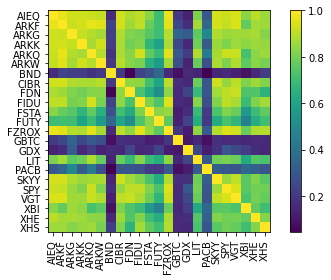

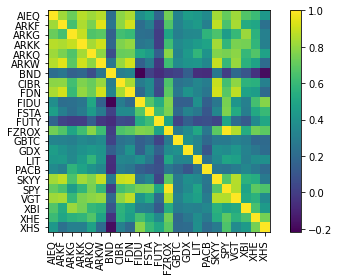

<AxesSubplot:>

In [7]:
past_df, future_df = prices.iloc[:-150], prices.iloc[-150:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

/Users/BrittanyGarza/opt/anaconda3/lib/python3.8/site-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(
/Users/BrittanyGarza/opt/anaconda3/lib/python3.8/site-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


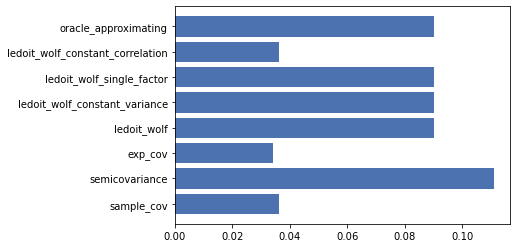

In [10]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(prices, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

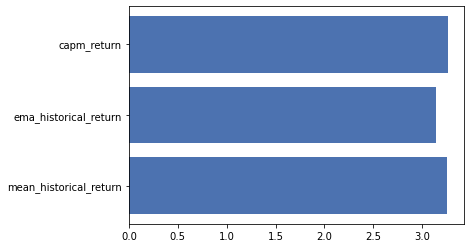

In [11]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

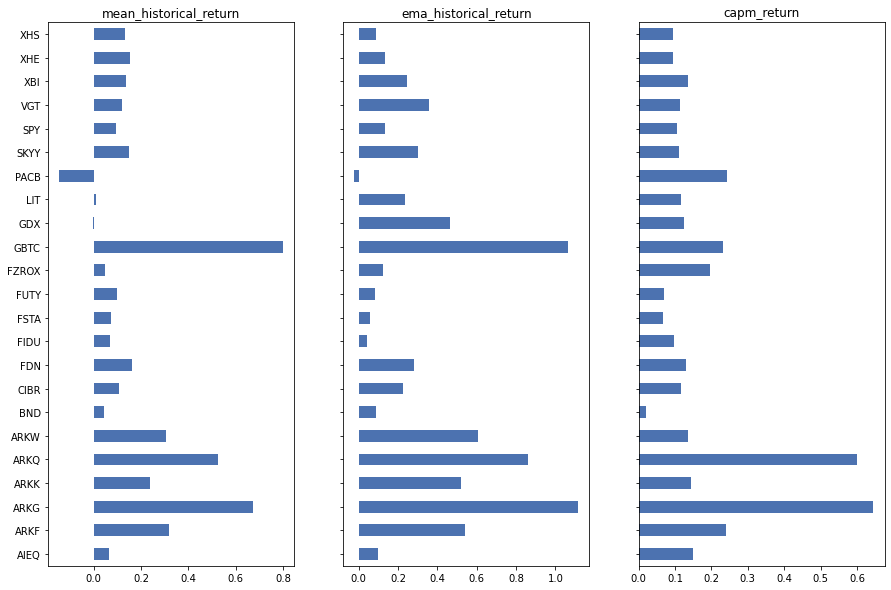

In [12]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

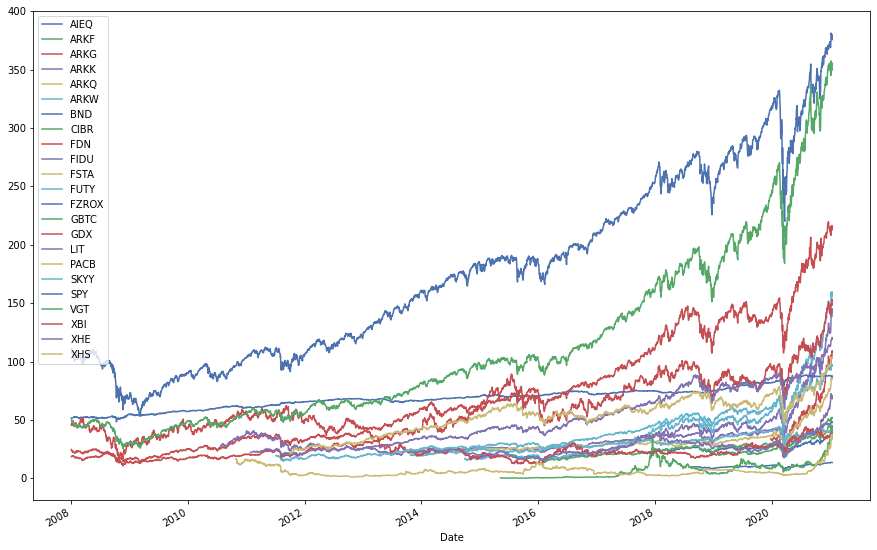

In [13]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [14]:
sector_mapper = {
    "GBTC": "Hard Assets", 
    "CIBR": "Tech", #Spec
    "SKYY": "Tech", #Spec
    "AIEQ": "Tech", #Spec 
    "ARKW": "Ark", 
    "ARKK": "Ark", 
    "ARKQ" : "Ark", 
    "ARKG" : "Healthcare", 
    "ARKF" : "Ark",    
    "XBI": "Healthcare", 
    "VGT": "Tech", 
    "BND" : "Bonds", 
    "GDX" : "Gold", 
    "PACB" : "Healthcare",
    "FSTA" : "Consumer Products", 
    "FIDU" : "Industrials", 
    "FUTY" : "Utilities", 
    "XHE" : "Healthcare", 
    "XHS" : "Healthcare",
    "FZROX" : "Market Only",
    "FDN" : "Market",
    "SPY": "Market",
    "LIT" : "Hard Assets"
}

sector_lower = {
    "Tech": 0.1,
    "Bonds" : 0,
    "Gold" : 0.05,
    "Healthcare" : 0.1,
    "Market Only" : 0.10

}

#    "Ark" : 0.15,
#    "Social": 0.05, 
#    "Hard Assets" : 0.2, #0.25 recommended
#    "Financial Services" : 0.03     
        
        
sector_upper = {
    "Tech": 0.4,
    "Bonds" : 0,
    "Market" : 0,
    "Ark" : 0.25,
}


In [37]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

#mu = expected_returns.mean_historical_return(prices)/4
#S = risk_models.sample_cov(prices)

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

arkk_index = ef.tickers.index("ARKK")
ef.add_constraint(lambda w: w[arkk_index] >= 0.03)

arkw_index = ef.tickers.index("ARKW")
ef.add_constraint(lambda w: w[arkw_index] >= 0.03)

arkg_index = ef.tickers.index("ARKG")
ef.add_constraint(lambda w: w[arkg_index] <= 0.2)

arkf_index = ef.tickers.index("ARKF")
ef.add_constraint(lambda w: w[arkf_index] >= 0.03)

arkq_index = ef.tickers.index("ARKQ")
ef.add_constraint(lambda w: w[arkq_index] >= 0.03)

gbtc_index = ef.tickers.index("GBTC")
ef.add_constraint(lambda w: w[gbtc_index] <= 0.08)

#ef.add_constraint(lambda w: w[10] >= 0.05)

#ef.max_sharpe()

ef.add_objective(objective_functions.L2_reg, gamma=0.6)  # gamme is the tuning parameter
ef.efficient_risk(0.08)
weights = ef.clean_weights()

with open("Export.csv", "w+") as filewriter:
    csvwriter = csv.DictWriter(filewriter, ["Ticker","Weight"])
    for ticker, weight in weights.items():
        csvwriter.writerow([ticker, weight])
    
weights.keys()

AttributeError: 'list' object has no attribute 'keys'

/Users/BrittanyGarza/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


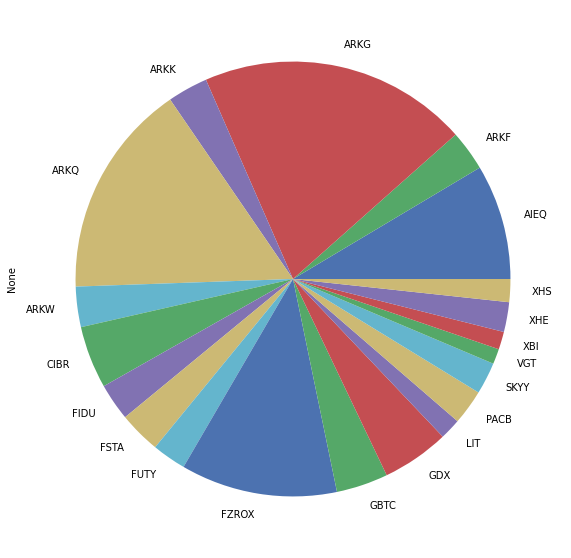

In [16]:
pd.Series(weights).plot.pie(figsize=(10,10))

In [17]:
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Tech: 0.167
Market: 0.000
Ark: 0.250
Market Only: 0.116
Healthcare: 0.278
Bonds: 0.000
Hard Assets: 0.054
Gold: 0.050
Utilities: 0.025
Industrials: 0.028
Consumer Products: 0.031


In [18]:
ef.portfolio_performance(verbose=True);

Expected annual return: 27.1%
Annual volatility: 8.0%
Sharpe Ratio: 3.13


In [19]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")#num_small = len([k for k in weights if weights[k] <= 1e-4])

3/23 tickers have zero weight


In [20]:
latest_prices = prices.iloc[-2]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $7.30 leftover


{'AIEQ': 22,
 'ARKF': 6,
 'ARKG': 18,
 'ARKK': 2,
 'ARKQ': 18,
 'ARKW': 2,
 'CIBR': 10,
 'FIDU': 6,
 'FSTA': 8,
 'FUTY': 6,
 'FZROX': 85,
 'GBTC': 9,
 'GDX': 14,
 'LIT': 2,
 'PACB': 7,
 'SKYY': 3,
 'XBI': 1,
 'XHE': 2,
 'XHS': 2}

In [21]:
inv_tickers = tickers
#inv_tickers = ["AAPL", "AIEQ", "AMD", "AMZN", "ARKG", "ARKQ", "BND", "CIBR", "CRSP","CSCO", "GBTC", "GDX", "MSFT", "NVDA", "OGIG","ORCL", "PACB","ROKU", "SKYY", "SPOT", "TXG", "TXN", "URA"]



In [22]:
inv150c = yf.download(inv_tickers, start=st150, end=date)['Close']

[*********************100%***********************]  23 of 23 completed


In [23]:
inv30h = yf.download(inv_tickers, start=st30, end=date)['High']

[*********************100%***********************]  23 of 23 completed


In [24]:
inv30l = yf.download(inv_tickers, start=st30, end=date)['Low']

[*********************100%***********************]  23 of 23 completed


In [25]:
inv8h = yf.download(inv_tickers, start=st8, end=date)['High']

[*********************100%***********************]  23 of 23 completed


In [26]:
inv8l = yf.download(inv_tickers, start=st8, end=date)['Low']

[*********************100%***********************]  23 of 23 completed


In [27]:
inv150c.tail()

,AIEQ,ARKF,ARKG,ARKK,ARKQ,ARKW,BND,CIBR,FDN,FIDU,...,GBTC,GDX,LIT,PACB,SKYY,SPY,VGT,XBI,XHE,XHS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-11,37.660000,50.959999,104.449997,138.220001,84.239998,154.970001,87.180000,45.000000,213.419998,48.080002,...,37.400002,35.779999,69.230003,34.259998,95.910004,378.690002,354.309998,148.059998,118.629997,102.639999
2021-01-12,38.450001,51.950001,104.339996,140.990005,85.660004,158.710007,87.160004,45.410000,215.850006,48.689999,...,38.919998,36.040001,71.300003,33.240002,96.680000,378.769989,353.790009,149.350006,119.029999,103.570000
2021-01-13,38.500000,52.180000,105.599998,141.720001,86.000000,159.399994,87.389999,44.830002,216.460007,48.330002,...,40.349998,35.639999,69.930000,34.349998,96.480003,379.790009,355.559998,148.570007,119.690002,102.650002
2021-01-14,38.980000,52.290001,109.300003,145.279999,88.150002,159.770004,87.279999,44.930000,214.860001,48.430000,...,43.529999,35.610001,69.010002,37.720001,97.629997,378.459991,353.339996,153.429993,120.610001,103.239998
2021-01-15,38.084999,51.700001,107.959999,141.910004,85.709999,156.669998,87.349998,44.790001,212.949997,47.759998,...,39.340000,34.509998,68.290001,36.919998,96.580002,375.700012,349.619995,151.729996,119.199997,102.970001


In [28]:
inv_last_price150 = inv150c.tail(1)

In [29]:
inv_last_price150 = inv_last_price150.T

In [30]:
ma150c = inv150c.mean(axis=0)
ma30h = inv30h.mean(axis=0)
ma30l = inv30l.mean(axis=0)
ma8h = inv8h.mean(axis=0)
ma8l = inv8l.mean(axis=0)

In [31]:
ma150c = pd.DataFrame(ma150c)
ma150c = ma150c.rename(columns = {0: '150 Moving Average'}, inplace = False)

In [32]:
ma30h = pd.DataFrame(ma30h)
ma30l = pd.DataFrame(ma30l)
ma8h = pd.DataFrame(ma8h)
ma8l = pd.DataFrame(ma8l)

In [33]:
prop150c = ma150c.insert(1,"Last Price",inv_last_price150)
prop150c = ma150c.insert(2,"30 MA High",ma30h)
prop150c = ma150c.insert(3,"8 MA High",ma8h)
prop150c = ma150c.insert(4,"30 MA Low",ma30l)
prop150c = ma150c.insert(5,"8 MA Low",ma8l)

In [34]:
ma150c["150 %Delta"]= ((ma150c["Last Price"]-ma150c["150 Moving Average"])/ma150c["150 Moving Average"])*100
ma150c["30H %Delta"]= ((ma150c["Last Price"]-ma150c["30 MA High"])/ma150c["30 MA High"])*100
ma150c["8H %Delta"]= ((ma150c["Last Price"]-ma150c["8 MA High"])/ma150c["8 MA High"])*100
ma150c["30L %Delta"]= ((ma150c["Last Price"]-ma150c["30 MA Low"])/ma150c["30 MA Low"])*100
ma150c["8L %Delta"]= ((ma150c["Last Price"]-ma150c["8 MA Low"])/ma150c["8 MA Low"])*100

In [35]:
ma150c.loc[((ma150c["150 %Delta"] > 0) & (ma150c["150 %Delta"] <= 12)) | (ma150c["30H %Delta"] > 0) , "Buy/ Sell"] = "Possibly Buy"
ma150c.loc[(ma150c["150 %Delta"] > 0) & (ma150c["150 %Delta"] <= 12) & (ma150c["30H %Delta"] > 0) & (ma150c["8H %Delta"] > 0), "Buy/ Sell"] = "Buy"
ma150c.loc[(ma150c["150 %Delta"] > 12) & (ma150c["30H %Delta"] > 0) & (ma150c["8H %Delta"] > 0), "Buy/ Sell"] = "Buy Cautiously"
ma150c.loc[(ma150c["8H %Delta"] > 0) & (ma150c["150 %Delta"] <= 0) & (ma150c["30H %Delta"] < 0), "Buy/ Sell"] = "Review Buy"
ma150c.loc[(ma150c["150 %Delta"] <= 0) & (ma150c["30L %Delta"] < 0), "Buy/ Sell"] = "Sell"
ma150c.loc[(ma150c["150 %Delta"] <= 0) & (ma150c["30L %Delta"] < 0) & (ma150c["8L %Delta"] < 0), "Buy/ Sell"] = "Really Sell"

In [36]:
ma150c

,150 Moving Average,Last Price,30 MA High,8 MA High,30 MA Low,8 MA Low,150 %Delta,30H %Delta,8H %Delta,30L %Delta,8L %Delta,Buy/ Sell
AIEQ,32.777136,38.084999,37.042631,38.642400,36.379421,37.965000,16.193798,2.813968,-1.442458,4.688304,0.316078,Possibly Buy
ARKF,43.935728,51.700001,51.158684,52.334000,50.140368,51.409800,17.671888,1.058113,-1.211447,3.110533,0.564485,Possibly Buy
ARKG,76.564175,107.959999,103.080895,108.310001,98.670526,104.556000,41.005894,4.733277,-0.323148,9.414638,3.255671,Possibly Buy
ARKK,106.054369,141.910004,135.874632,144.250000,131.249209,140.159998,33.808729,4.441868,-1.622181,8.122559,1.248577,Possibly Buy
ARKQ,65.390360,85.709999,80.819947,87.195801,78.753473,85.178801,31.074366,6.050551,-1.703983,8.833294,0.623627,Possibly Buy
ARKW,124.433787,156.669998,154.134208,160.054398,150.589211,156.650000,25.906317,1.645183,-2.114531,4.037997,0.012766,Possibly Buy
BND,88.054757,87.349998,87.810527,87.370001,87.635789,87.150000,-0.800364,-0.524457,-0.022894,-0.326112,0.229488,Sell
CIBR,37.896107,44.790001,44.918895,45.387401,44.021316,44.637000,18.191563,-0.286949,-1.316224,1.746165,0.342768,NaN
FDN,199.559514,212.949997,216.175788,217.044000,212.625790,213.080002,6.710020,-1.492207,-1.886255,0.152478,-0.061012,Possibly Buy
FIDU,43.471553,47.759998,47.544737,48.557999,46.872631,47.913999,9.864946,0.452756,-1.643398,1.893146,-0.321411,Possibly Buy
